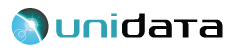
# Introduction to MetPy Prerequisite Lessons
## Foundations in Data Access Activity Notebook

<br>
<p><b>How to use this Notebook:</b><br>
This notebook pairs with the <i>Foundations in Data Access</i> lesson. <br>
Follow along with the instructions presented in the lesson, then  <br>
return to this notebook when prompted. After an activity, you  <br>
will be prompted to return to the lesson to proceed. </p>

### Activity 0: Import required packages

In [1]:
## CELL 0A
## INSTRUCTIONS: Run this cell

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Here is where we import the TDSCatalog class from Siphon for obtaining our data 
from siphon.catalog import TDSCatalog


### Activity 1: Getting started with the THREDDS Data Server
We can easily view a THREDDS Data Server (TDS) Catalog in a browser. For this activity, we'll examine Unidata's TDS catalog of case studies. 

<a href="https://thredds.ucar.edu/thredds/casestudies/catalog.html" target="blank">https://thredds.ucar.edu/thredds/casestudies/catalog.html</a>

In [2]:
## CELL 1A 
## INSTRUCTIONS: Open the TDS link above in a new tab in your browser. 
## Then browse the folders to find catalog URL to:
##    Hurricane Harvey GOES-16 imagery
##    Mesoscale-1 extent
##    Channel 02
##    on August 26, 2017

# Paste the URL here as a string:
url = "https://thredds.ucar.edu/thredds/catalog/casestudies/harvey/goes16/Mesoscale-1/Channel02/20170826/catalog.html"

# Change the URL above to be an xml document using Python's built-in replace module
xmlurl = url.replace(".html", ".xml")
print(xmlurl)


https://thredds.ucar.edu/thredds/catalog/casestudies/harvey/goes16/Mesoscale-1/Channel02/20170826/catalog.xml


Now we have the catalog located, it's time to create and examine the TDSCatalog object

In [3]:
## CELL 1B
## INSTRUCTIONS: Run this cell

# Create the TDS Catalog object, satcat
satcat = TDSCatalog(xmlurl)

# The catalog itself isn't very useful to us. 
# What `is` useful is the datasets property of the object. 
# There are a LOT of items in the datasets property, so
# let's just examine the first 10.
satcat.datasets[0:10]


[GOES16_Mesoscale-1_20170826_235955_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235855_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235755_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235655_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235555_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235455_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235355_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235255_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235155_0.64_500m_29.5N_96.5W.nc4,
 GOES16_Mesoscale-1_20170826_235055_0.64_500m_29.5N_96.5W.nc4]

The `datasets` property of the `satcat` object shows us a list of the .nc4 files that contain the data we'll use. 

In [4]:
## CELL 1C
## INSTRUCTIONS: Determine how many total items are in satcat.datasets
# Type your code below:


#answer:
len(satcat.datasets)

2850

We now have a list of all files available in the catalog, but the data are not yet pulled into memory for visualization or analysis. For this, we need to use the `remote_access()` method from Siphon. 

In [5]:
## CELL 1D
## INSTRUCTIONS: Run this cell

# We will arbitrarily choose the 1000th file in the list to explore
# In the next section, we will discuss the use of xarray here
satdata = satcat.datasets[1000].remote_access(use_xarray=True)

# Print the type of object that satdata is
type(satdata)

xarray.core.dataset.Dataset

Now we have an xarray `Dataset` that we can work with. However, we have not yet pulled back the layers enough to expose a single array we can visualize or do analysis with. To do any further work, we'll need to parse not only the data, but the metadata as well. In the next section, we'll explore this type of multi-dimensional dataset.

## When the above activity is complete, save this notebook and return to the course tab

### Activity 2: Explore Multi-dimensional data structures 
#### xarray HTML formatted summary tool
Xarray has an HTML-formatted interactive summary tool for examing datasets. Simply execute the variable name to create the summary. 

In [6]:
## CELL 2A 
## INSTRUCTIONS: Run this cell to create a formatted exploration tool for the xarray dataset

satdata


<xarray.Dataset>
Dimensions:             (y: 2468, x: 2184)
Coordinates:
    time                datetime64[ns] ...
  * y                   (y) float32 6.811e+05 6.806e+05 ... -5.996e+05
  * x                   (x) float32 -5.83e+05 -5.824e+05 ... 5.497e+05 5.503e+05
Data variables:
    Sectorized_CMI      (y, x) float32 ...
    lambert_projection  int32 ...
Attributes: (12/30)
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    abi_mode:                    3
    ...                          ...
    pixel_y_size:                0.5191087889308389
    satellite_latitude:          0.0
    satellite_longitude:         -89.5
    satellite_altitude:          35785831.0
    created_by:                  ldm-alchemy
    product_tiles_received:      9

We now see an interactive summary of the dimensions, coordinates, variables, attributes for the dataset. This information can help with plotting, analysis, and generally understanding the data you are working with. Answer the questions below given the information in the HTML formatted summary table above.

In [7]:
## CELL 2B
## INSTRUCTIONS: Find the following information about the dataset:

# 1. The title, or full description of the dataset
#     answer: Sectorized Cloud and Moisture Imagery for the TMESO region.
# 2. The name of the variable that contains the satellite imagery 
#     answer: Sectorized_CMI
# 3. The coordinate system the data were collected in
#     answer: Lambert Conformal
# 4. The size of the array (# cells in x and y)
#     answer: x=2184 y=2468
# 5. The metadata conventions the dataset uses
#     answer: CF-1.6

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">More Info</p>
    You may see the CF (Climate and Forecasting) metadata conventions in many popular atmospheric datasets. These conventions provide standardized variable names and units and recommendations on metadata such as projection information and coordinate information. You can read more about CF conventions here: <a href="cfconventions.org" target="blank">https://cfconventions.org/</a>
</div>

#### Get the data array
There are several ways to extract the array containing the satellite imagery from the xarray dataset depending on your specific use case. The method we'll use in this example uses MetPy and the parse_cf() method. 

In [8]:
## CELL 2C
## INSTRUCTIONS: set `var` as the name of the data variable from number 2 above as a string

var = "Sectorized_CMI"

# import metpy
import metpy

# extract the data array from the xarray dataset
satarray = satdata.metpy.parse_cf(var)
type(satarray)

xarray.core.dataarray.DataArray

#### Plot on projected axes with Cartopy
Now we have an array that we can do analysis with or plot. Let's now pull the projection information from the dataset and plot it on projected axes with Cartopy. 

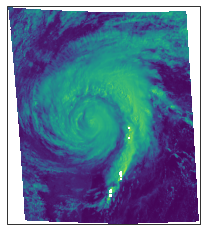

In [9]:
## CELL 2D
## INSTRUCTIONS: Set the projection for the data array
# given the information in the satdata object
# Use the Cartopy documentation for syntax
# https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
# Or refer to the Foundations in Cartopy lesson

# Set the projection of the data
proj = ccrs.LambertConformal()

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(projection=proj)
ax.imshow(satarray,transform=proj)


## When the above activity is complete, save this notebook and return to the course tab